<a href="https://colab.research.google.com/github/Esandu-Meth-Obadaarachchi/HCHO-level-Time-series-forecasting/blob/main/kurunegala_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

import matplotlib as mpl
import numpy as np
import pandas as pd
import statsmodels as sm
import tensorflow as tf
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


warnings.filterwarnings("ignore")


# Extra settings
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
print(tf.__version__)

2.15.0


In [2]:
from google.colab import drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# File paths
kurunegala_full_csv_path = '/content/drive/MyDrive/data engineering CW/kurunegala_df_full.csv'

df = pd.read_csv(kurunegala_full_csv_path, header=0, index_col=0)


In [5]:

df.set_index('Current Date', inplace=True)


In [6]:
df.head()

Location   Next Date  HCHO reading  Temperature  \
Current Date                                                             
2019-01-01    Kurunegala Proper  2019-01-02      0.000088        21.72   
2019-01-02    Kurunegala Proper  2019-01-03      0.000137        21.18   
2019-01-03    Kurunegala Proper  2019-01-04      0.000148        20.96   
2019-01-04    Kurunegala Proper  2019-01-05      0.000000        20.68   
2019-01-05    Kurunegala Proper  2019-01-06      0.000249        22.26   

              Skin Temperature  Specific Humidity  Relative Humidity  \
Current Date                                                           
2019-01-01               21.86              14.47              87.81   
2019-01-02               21.30              13.98              87.06   
2019-01-03               20.98              13.55              86.38   
2019-01-04               20.59              13.31              86.06   
2019-01-05               22.37              15.44              88.88   

              Precipitation  
Current Date                 
2019-01-01             0.09  
2019-01-02             0.01  
2019-01-03             0.02  
2019-01-04             0.00  
2019-01-05             0.04

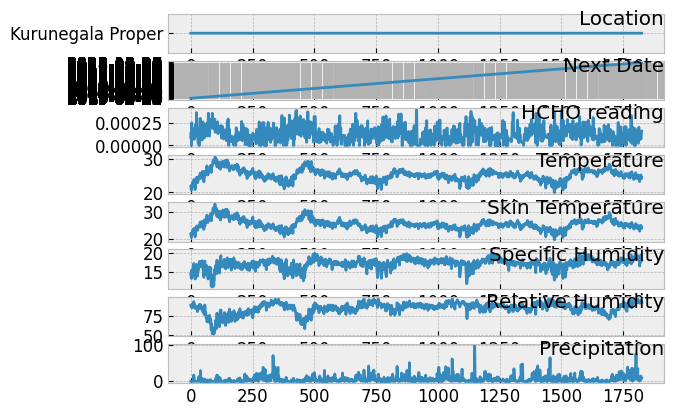

In [7]:
values = df.values
groups = [0, 1, 2, 3, 4, 5, 6, 7]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1


plt.show()

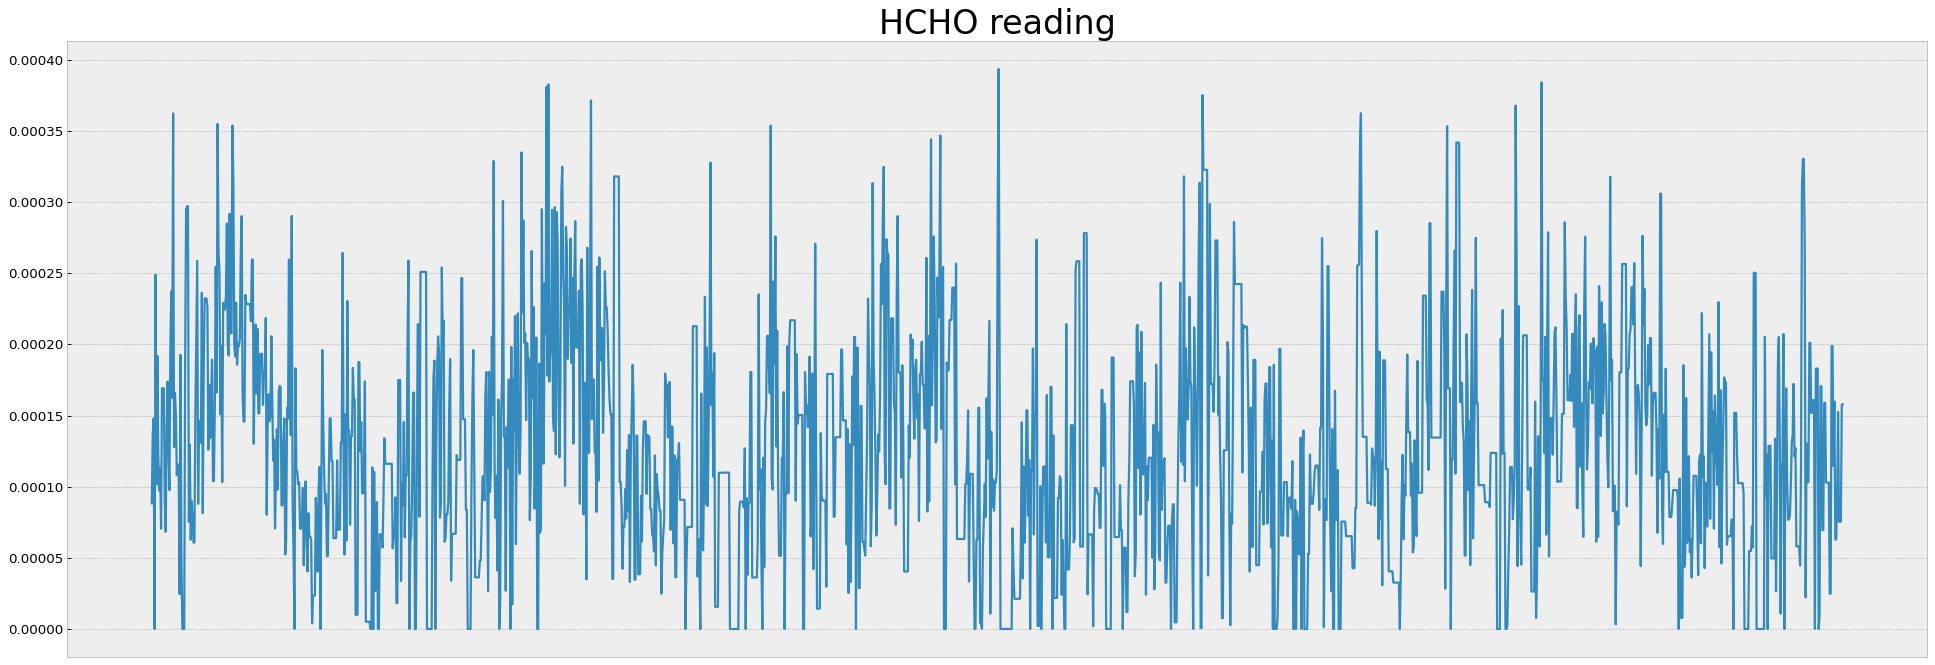

In [8]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('HCHO reading', fontsize=30)
plt.plot(df['HCHO reading'])
plt.xticks([])
plt.show()

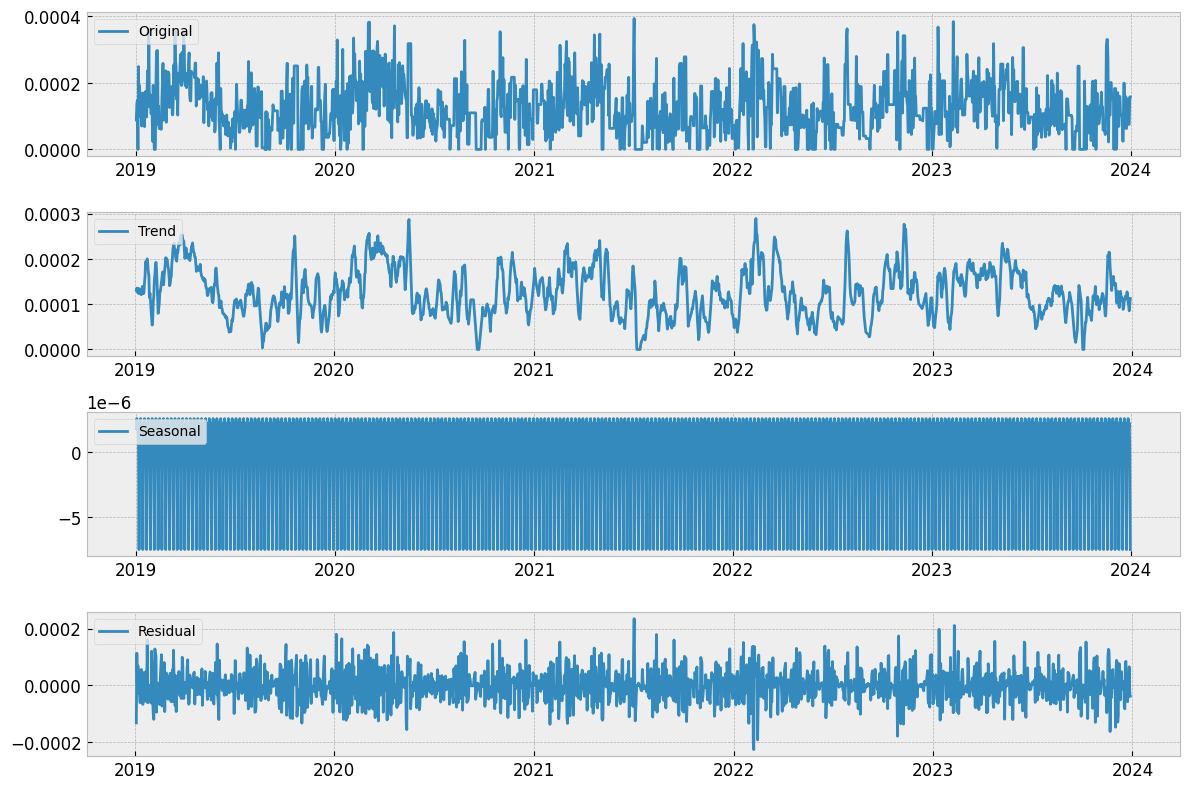

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert index to DatetimeIndex
df.index = pd.to_datetime(df.index)

# Perform seasonal decomposition
result = seasonal_decompose(df['HCHO reading'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



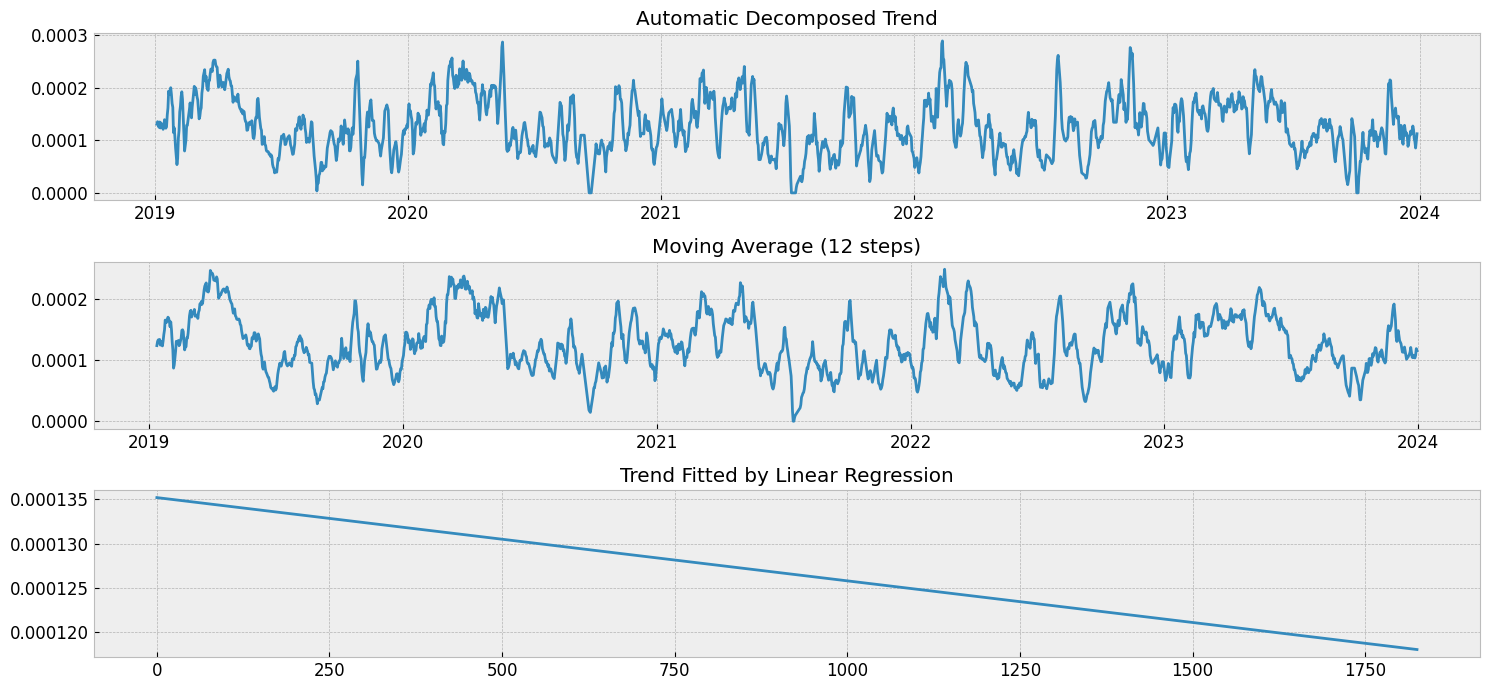

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Automatic decomposition
result = seasonal_decompose(df['HCHO reading'], model='additive')

# Moving average
moving_avg = df['HCHO reading'].rolling(12).mean()

# Fit a linear regression model
X = np.arange(len(df)).reshape(-1, 1)
y = df['HCHO reading'].values
model = LinearRegression()
model.fit(X, y)
trend_lr = model.predict(X)

# Plotting
fig = plt.figure(figsize=(15, 7))
layout = (3, 1)
pm_ax = plt.subplot2grid(layout, (0, 0))
mv_ax = plt.subplot2grid(layout, (1, 0))
fit_ax = plt.subplot2grid(layout, (2, 0))

pm_ax.plot(result.trend, label="Automatic decomposed trend")
pm_ax.set_title("Automatic Decomposed Trend")

mv_ax.plot(moving_avg, label="Moving average (12 steps)")
mv_ax.set_title("Moving Average (12 steps)")

fit_ax.plot(trend_lr, label="Trend fitted by linear regression")
fit_ax.set_title("Trend Fitted by Linear Regression")

plt.tight_layout()
plt.show()


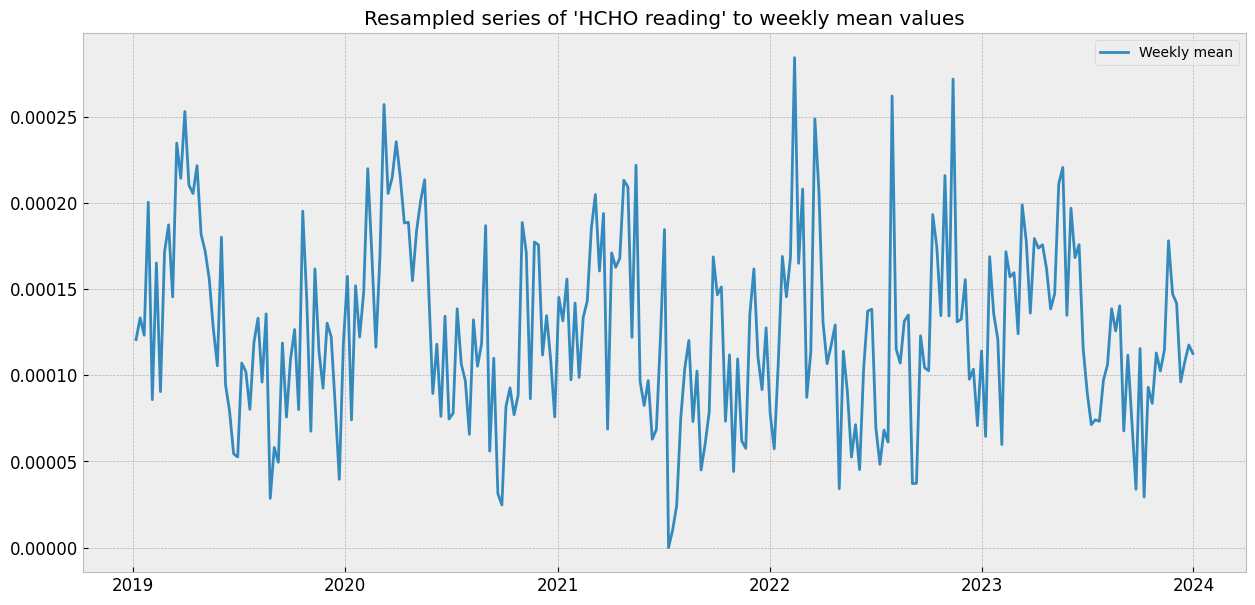

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'HCHO reading' column to numeric, coerce errors to NaN
df['HCHO reading'] = pd.to_numeric(df['HCHO reading'], errors='coerce')

weekly_mean = df['HCHO reading'].resample('W').mean()

# Plot the weekly mean values
plt.figure(figsize=(15, 7))
plt.plot(weekly_mean, label='Weekly mean')
plt.title("Resampled series of 'HCHO reading' to weekly mean values")
plt.legend()
plt.show()



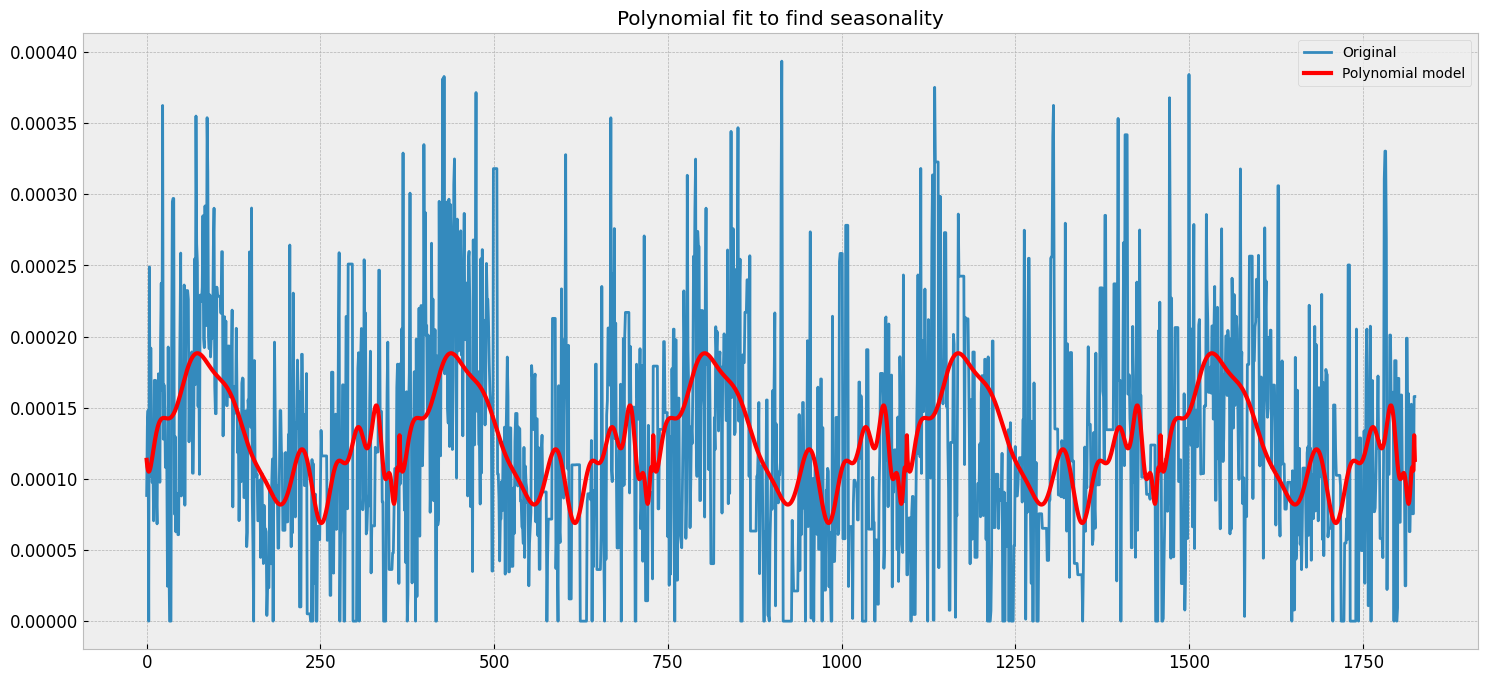

In [ ]:
series = df['HCHO reading'].values

# Define X values as days of the year
X = [i % 365 for i in range(0, len(series))]
y = series
degree = 100

# Fit polynomial
coef = np.polyfit(X, y, degree)

# Create curve
curve = np.polyval(coef, X)

# Plot curve over original data
plt.plot(series, label='Original')
plt.plot(curve, color='red', linewidth=3, label='Polynomial model')
plt.legend()
plt.title("Polynomial fit to find seasonality")
plt.show()


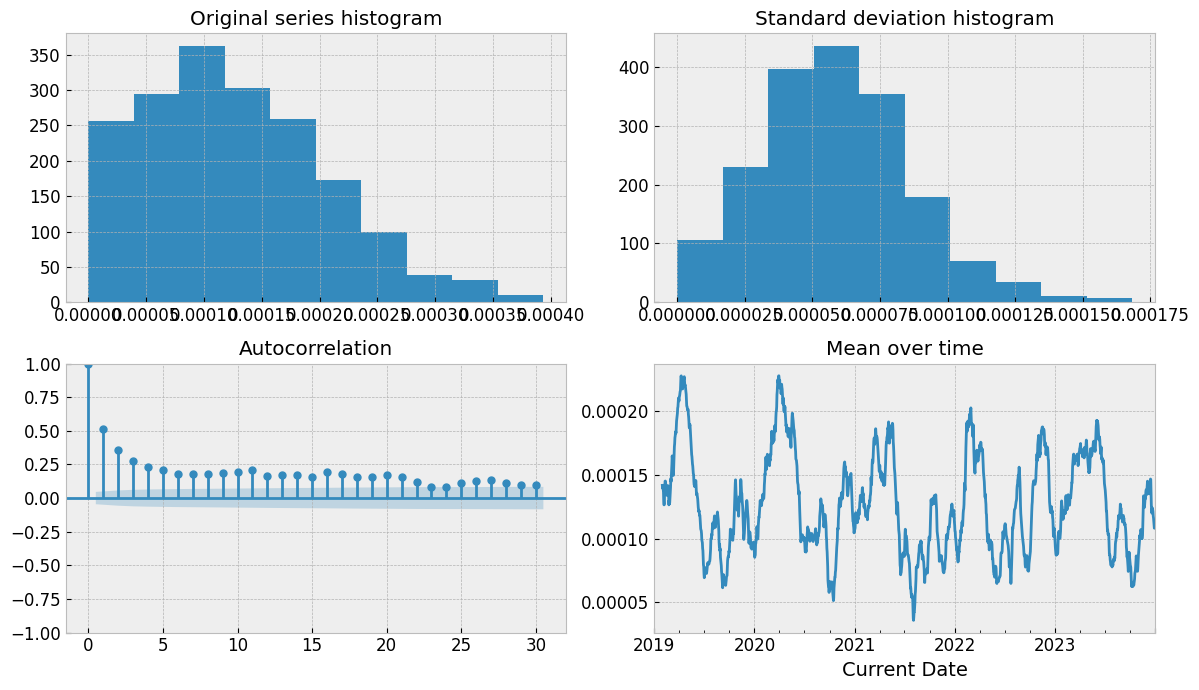

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Set up figure and subplots
fig = plt.figure(figsize=(12, 7))
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
mean_ax = plt.subplot2grid(layout, (1, 1))

# Plot histogram of the original series
df['HCHO reading'].hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

# Plot autocorrelation
plot_acf(df['HCHO reading'], lags=30, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

# Calculate rolling standard deviation
rolling_std = df['HCHO reading'].rolling(7).std()

# Plot histogram of the rolling standard deviation
rolling_std.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

# Calculate rolling mean
rolling_mean = df['HCHO reading'].rolling(30).mean()

# Plot rolling mean
rolling_mean.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


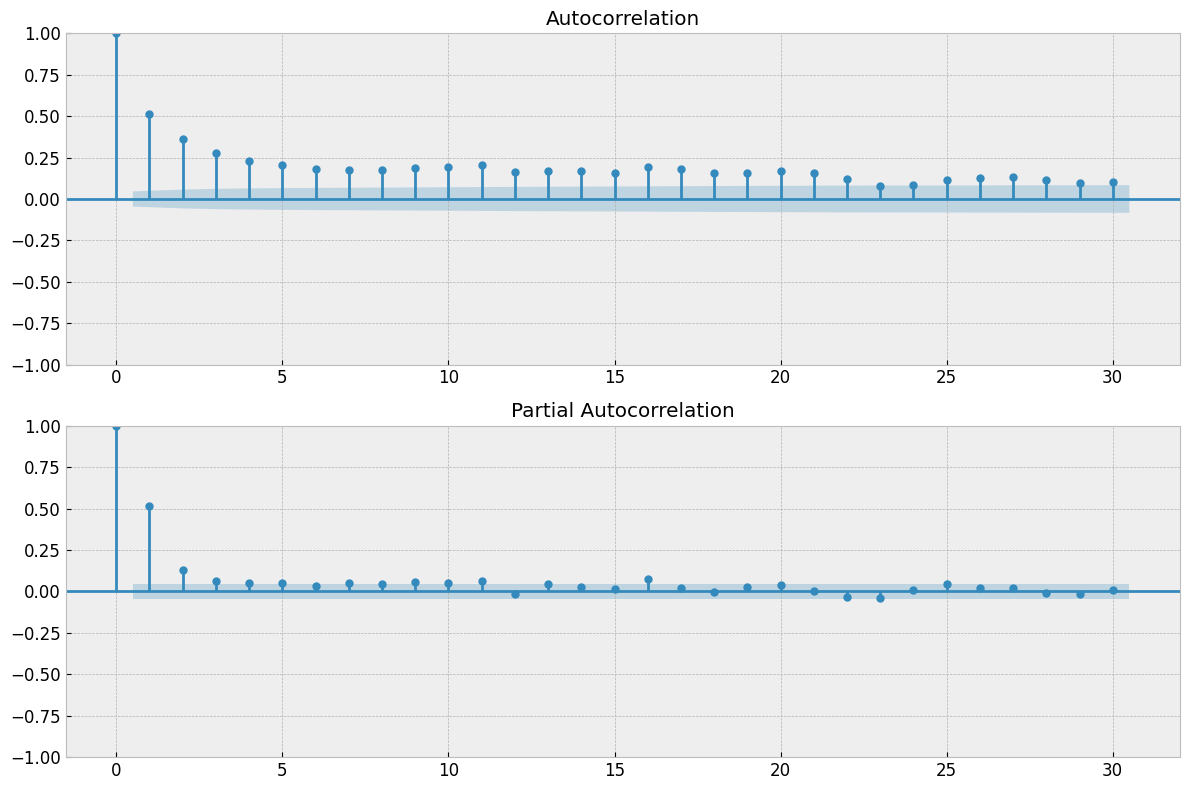

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Set up figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot autocorrelation
plot_acf(df['HCHO reading'], lags=30, ax=ax1)
ax1.set_title("Autocorrelation")

# Plot partial autocorrelation
plot_pacf(df['HCHO reading'], lags=30, ax=ax2)
ax2.set_title("Partial Autocorrelation")

plt.tight_layout()
plt.show()


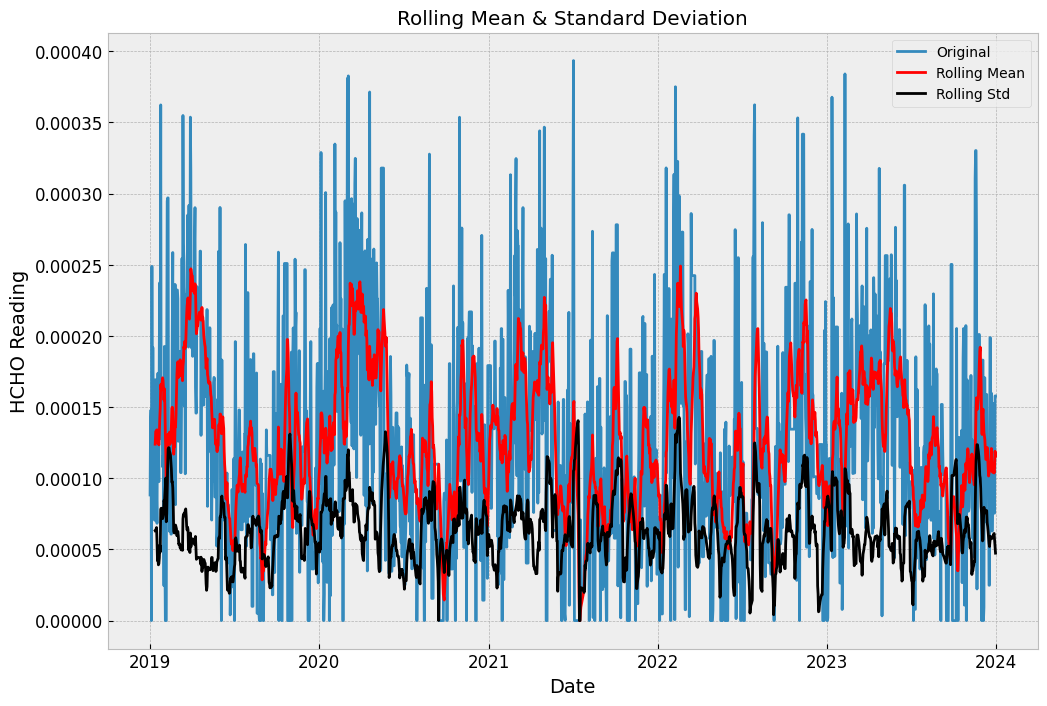

In [ ]:
# Determine rolling statistics
rolmean = df['HCHO reading'].rolling(window=12).mean()
rolstd = df['HCHO reading'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(12, 8))
plt.plot(df['HCHO reading'], label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.show()


# ***ADF Test***

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Extract 'HCHO reading' data
X = df['HCHO reading'].values

# Perform Augmented Dickey-Fuller test
result = adfuller(X)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.241556327338422
p-value: 4.6837503727686616e-08
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


# **Splitting the dataset**

In [10]:
# Set the split date
split_date = '2023-01-01'

# Split the DataFrame into training and testing sets
df_training = df.loc[df.index <= split_date]
df_test = df.loc[df.index > split_date]


print(f"{len(df_training)} days of training data \n {len(df_test)} days of testing data ")

1462 days of training data 
 364 days of testing data 


# **AR model**

In [11]:
from tqdm import tqdm  # Import tqdm for progress bar
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Initialize dictionaries to store results and predictions
resultsDict = {}
predictionsDict = {}

# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = []

for t in tqdm(range(len(df_test['HCHO reading']))):
    temp_train = df['HCHO reading'][:len(df_training)+t]
    model = AutoReg(temp_train, lags=1)  # You can adjust the number of lags as needed
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))
    yhat.append(predictions[0])

yhat = pd.Series(yhat, index=df_test.index)
resultsDict['AR'] = mean_squared_error(df_test['HCHO reading'], yhat)
predictionsDict['AR'] = yhat


100%|██████████| 364/364 [00:02<00:00, 178.18it/s]


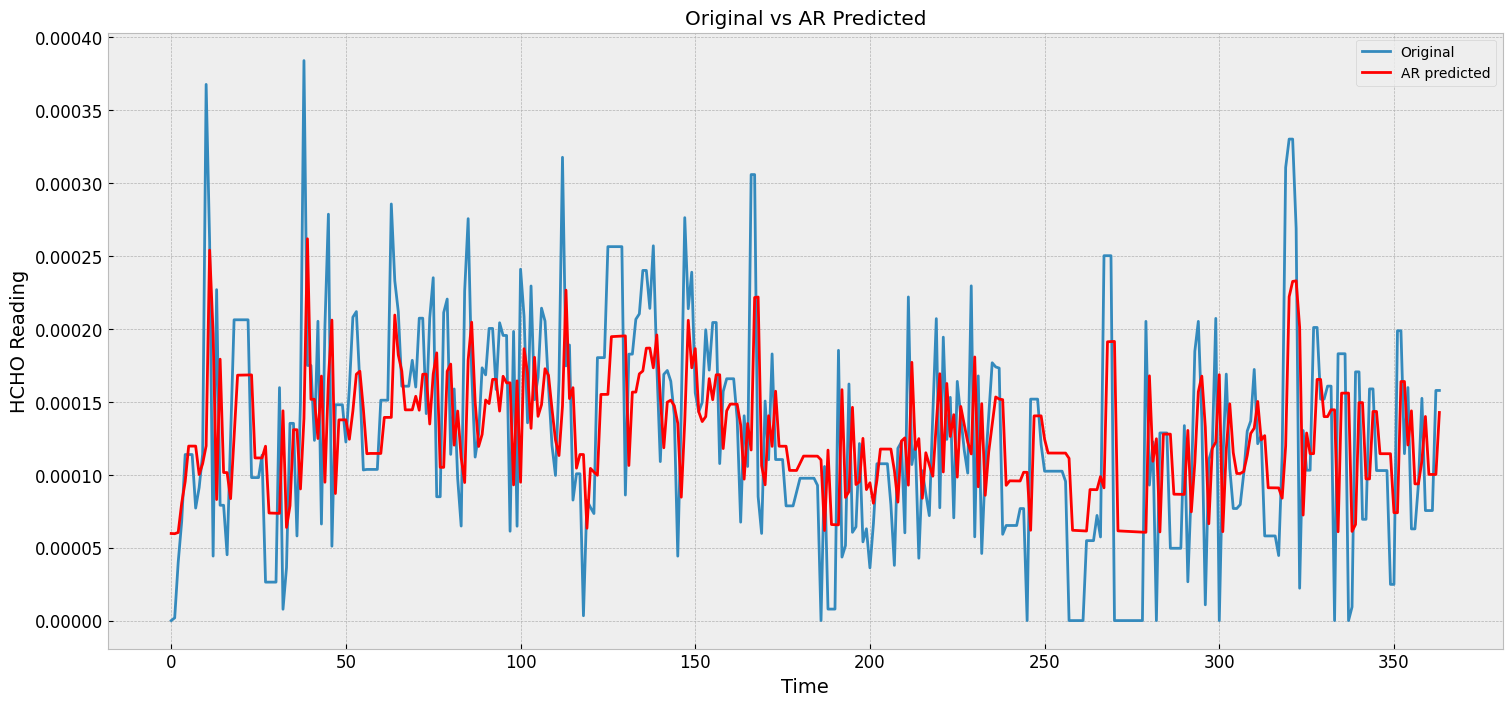

In [ ]:
# Plot the results
plt.plot(df_test['HCHO reading'].values, label='Original')
plt.plot(yhat.values, color='red', label='AR predicted')
plt.legend()
plt.title('Original vs AR Predicted')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.show()


# ***MA model***

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

index = len(df_training)
yhat = []

for t in tqdm(range(len(df_test['HCHO reading']))):
    temp_train = df['HCHO reading'][:len(df_training)+t]
    model = ARIMA(temp_train, order=(0, 0, 1))  # MA model with order (0, 0, 1)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=1)
    yhat.append(predictions[0])

# Convert predictions to a pandas Series
yhat = pd.Series(yhat, index=df_test.index)

# Calculate and store the evaluation metrics
resultsDict['MA'] = mean_squared_error(df_test['HCHO reading'], yhat)
predictionsDict['MA'] = yhat


100%|██████████| 364/364 [10:31<00:00,  1.73s/it]


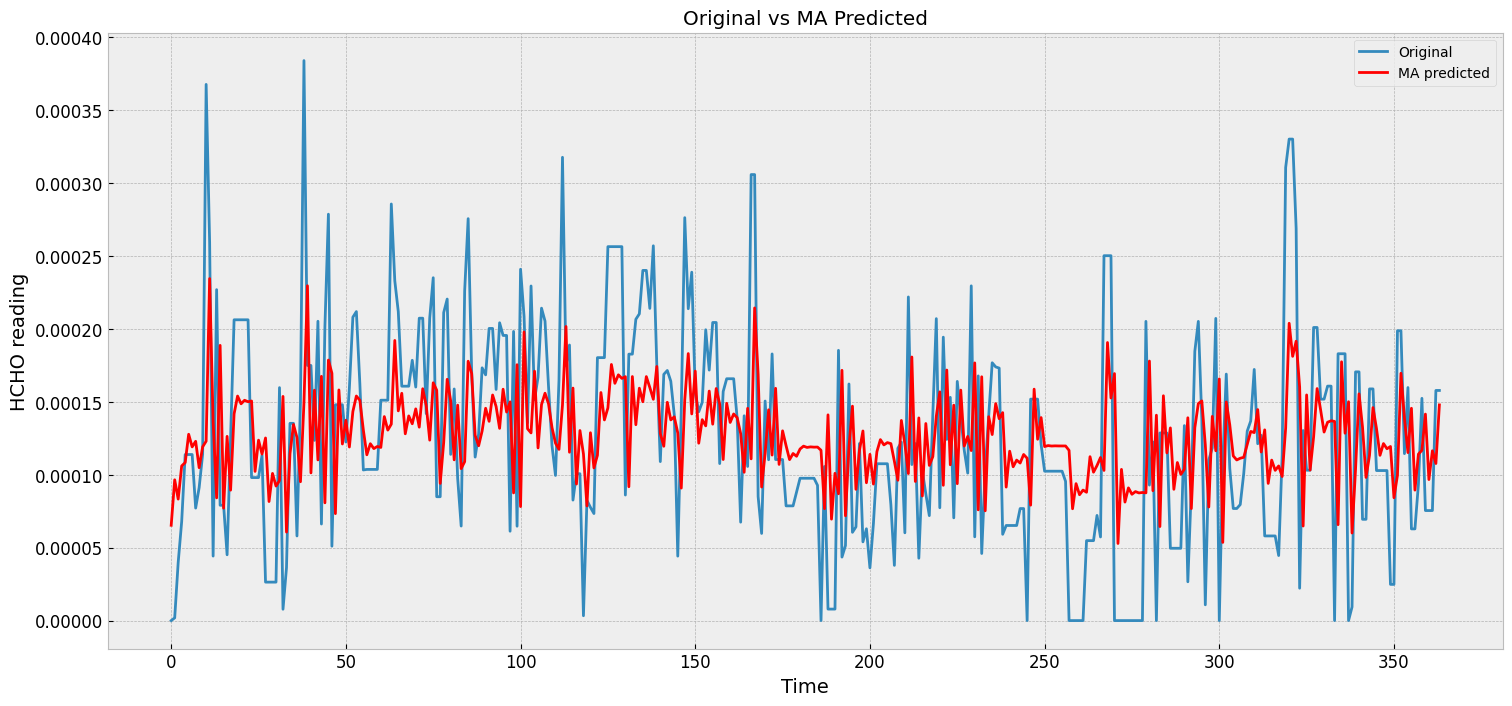

In [ ]:
# Plot the original data and the predicted values of Moving Average
plt.plot(df_test['HCHO reading'].values, label='Original')
plt.plot(yhat.values, color='red', label='MA predicted')
plt.legend()
plt.title('Original vs MA Predicted')
plt.xlabel('Time')
plt.ylabel('HCHO reading')
plt.show()


# ***AR vs MA***

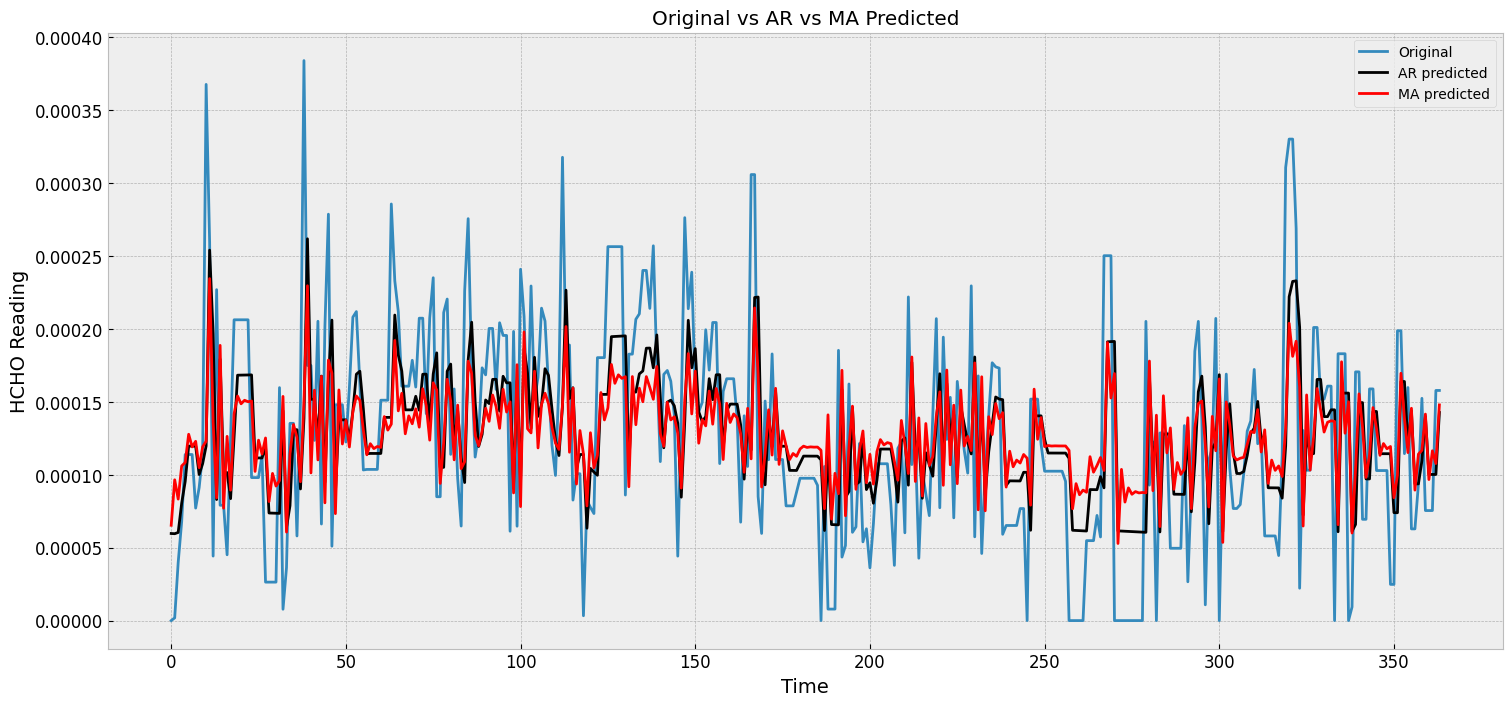

In [ ]:
import matplotlib.pyplot as plt

# Plot the original data
plt.plot(df_test['HCHO reading'].values, label='Original')

# Plot the predicted values of Autoregression (AR)
plt.plot(predictionsDict['AR'].values, color='black', label='AR predicted')

# Plot the predicted values of Moving Average (MA)
plt.plot(predictionsDict['MA'].values, color='red', label='MA predicted')

# Add labels and legend
plt.title('Original vs AR vs MA Predicted')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.legend()

# Show the plot
plt.show()



# ***ARMA model***

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

index = len(df_training)
yhat = []

for t in tqdm(range(len(df_test['HCHO reading']))):
    temp_train = df['HCHO reading'][:len(df_training) + t]
    model = ARIMA(temp_train, order=(1, 0, 1))  # ARMA model with p=1, q=1
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=1)[0]
    yhat.append(predictions)

yhat = pd.Series(yhat, index=df_test.index)
resultsDict['ARMA'] = mean_squared_error(df_test['HCHO reading'], yhat)
predictionsDict['ARMA'] = yhat

100%|██████████| 361/361 [13:28<00:00,  2.24s/it]


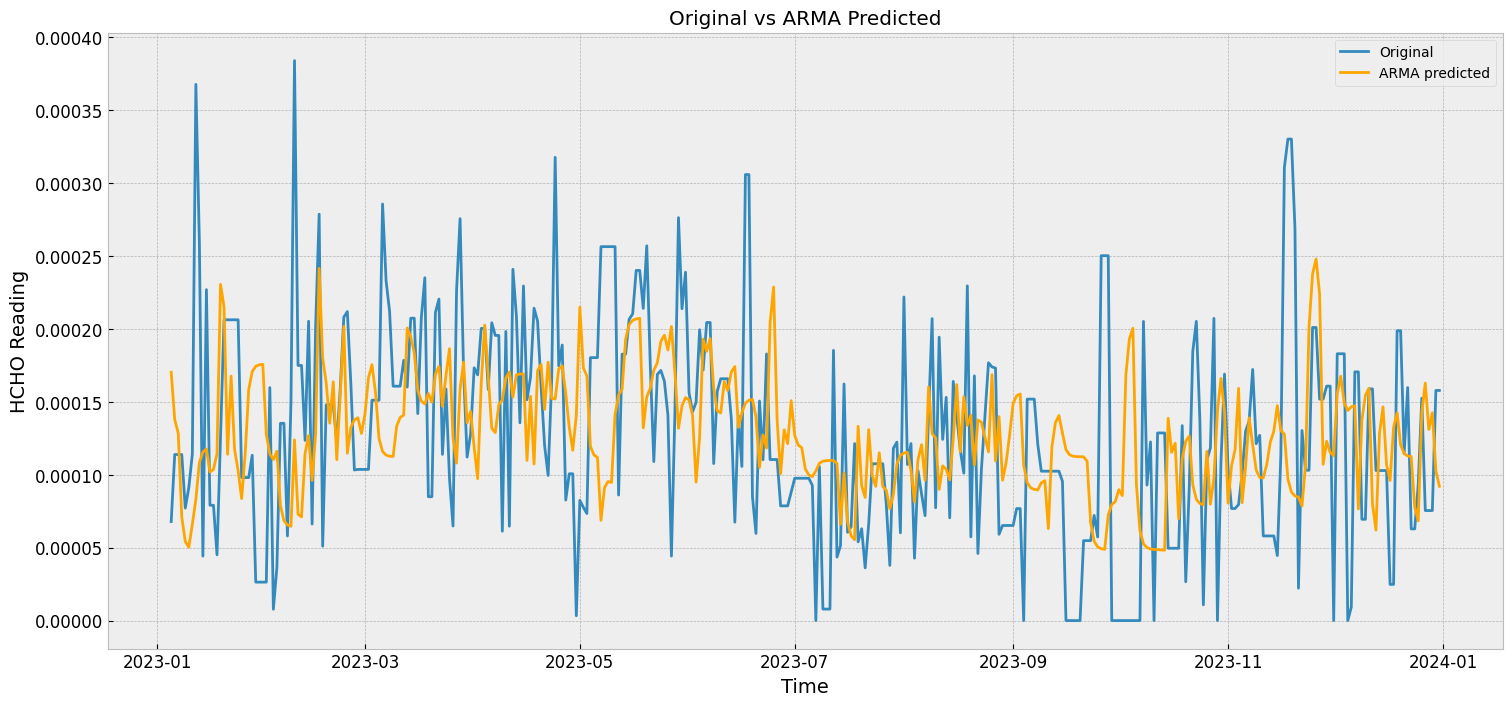

In [ ]:
# Plot the results
plt.plot(df_test.index, df_test['HCHO reading'].values, label='Original')
plt.plot(df_test.index, predictionsDict['ARMA'], color='orange', label='ARMA predicted')
plt.legend()
plt.title('Original vs ARMA Predicted')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.show()


# ***AR vs MA vs ARMA***

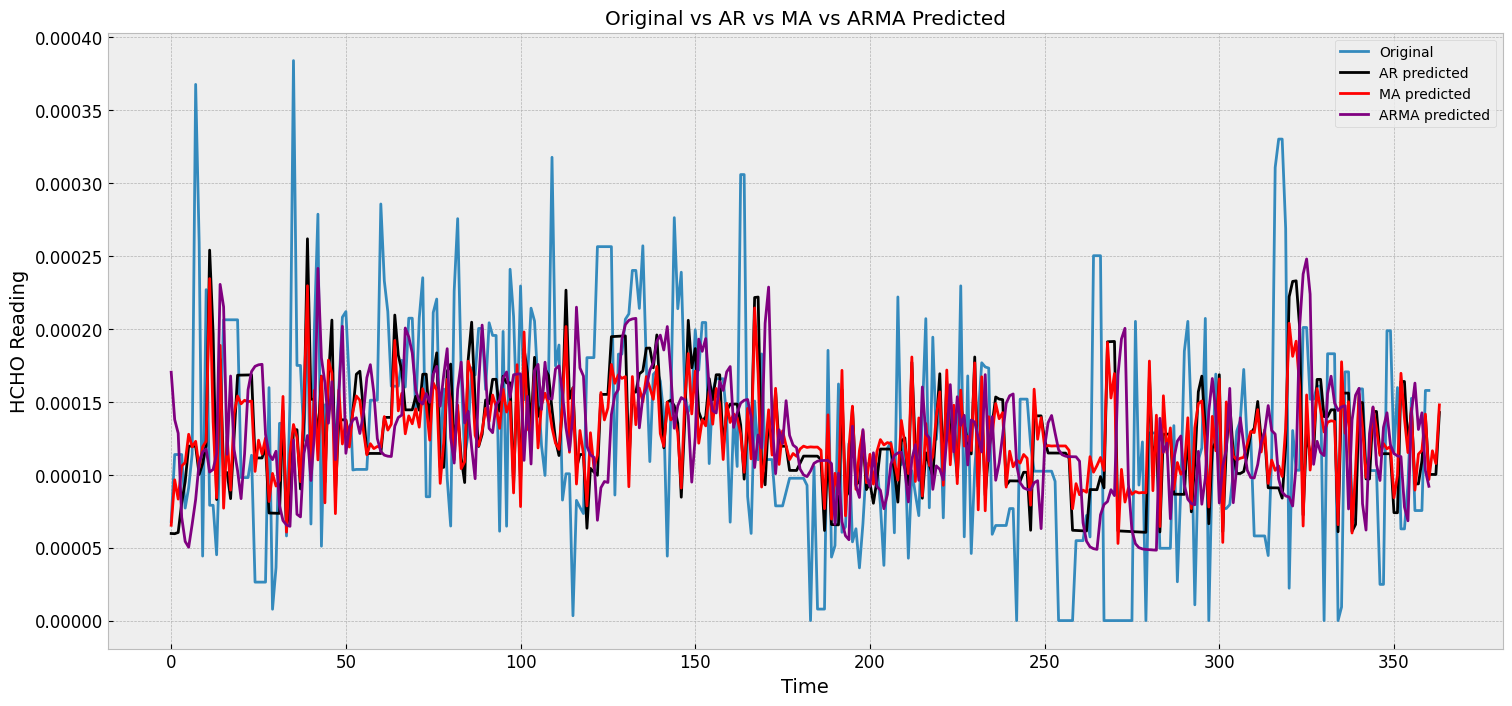

In [ ]:
import matplotlib.pyplot as plt

# Plot the original data
plt.plot(df_test['HCHO reading'].values, label='Original')

# Plot the predicted values of Autoregression (AR)
plt.plot(predictionsDict['AR'].values, color='black', label='AR predicted')

# Plot the predicted values of Moving Average (MA)
plt.plot(predictionsDict['MA'].values, color='red', label='MA predicted')


# Plot the predicted values of Moving Average (MA)
plt.plot(predictionsDict['ARMA'].values, color='purple', label='ARMA predicted')

# Add labels and legend
plt.title('Original vs AR vs MA vs ARMA Predicted')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.legend()

# Show the plot
plt.show()

# ***AUTO ARIMA***

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

# Build the model
model = auto_arima(df_training['HCHO reading'], trace=True,
                    error_action='ignore', suppress_warnings=True,
                    seasonal=True, m=12, stepwise=True)
model.fit(df_training['HCHO reading'])

# Predictions
start_index = df_test.index.min()
end_index = df_test.index.max()
pred = model.predict(n_periods=len(df_test))
pred = pd.DataFrame(pred, index=df_test.index, columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-23831.247, Time=3.16 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-23448.190, Time=0.24 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-23631.799, Time=4.45 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-23735.204, Time=6.64 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-23450.051, Time=0.18 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-23833.989, Time=1.33 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-23827.825, Time=1.08 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-23832.698, Time=8.19 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-23832.997, Time=4.27 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-23830.709, Time=8.29 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-23805.989, Time=4.78 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=-23808.626, Time=42.24 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=-23851.689, Time=4.79 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=-23846.825, Time

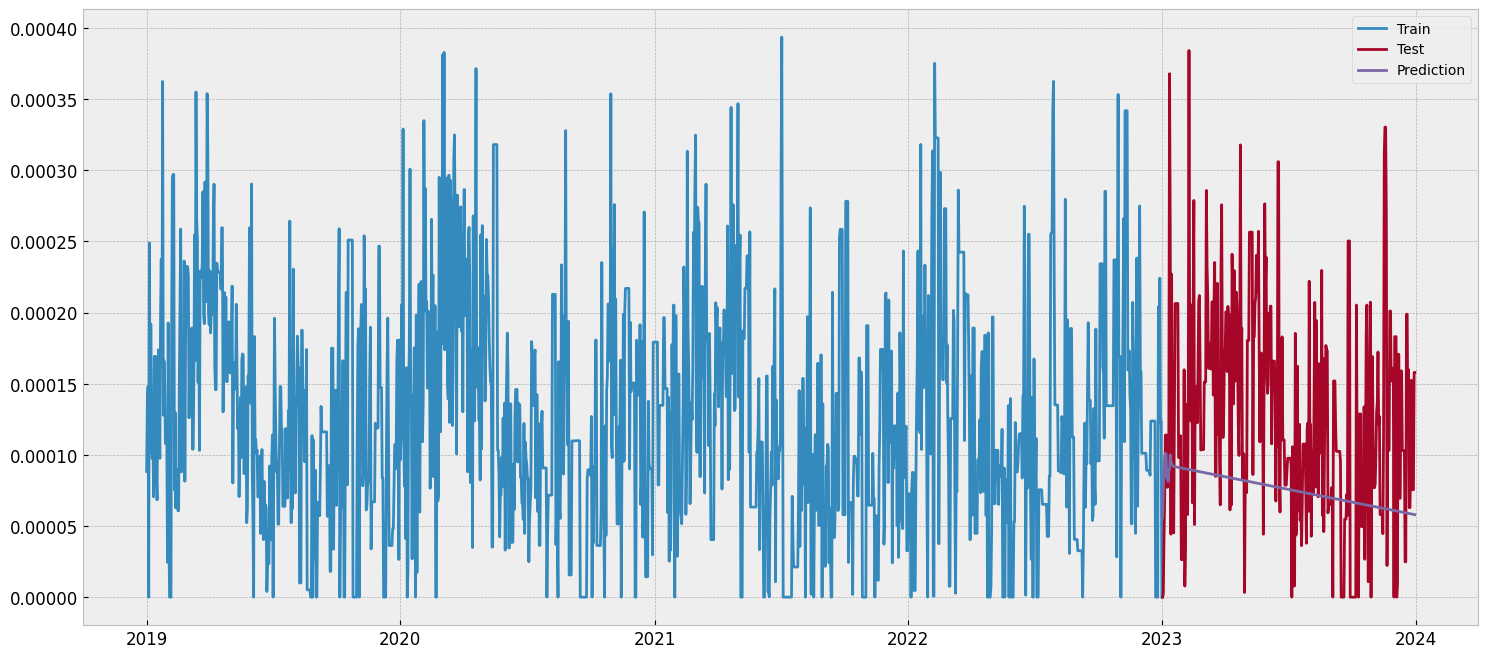

In [ ]:
# Plot the predictions for the test set
plt.plot(df_training['HCHO reading'], label='Train')
plt.plot(df_test['HCHO reading'], label='Test')
plt.plot(pred, label='Prediction')
plt.legend()
plt.show()

# ***SARIMA***

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
index = len(df_training)
yhat = []

for t in tqdm(range(len(df_test['HCHO reading']))):
    temp_train = df['HCHO reading'][:len(df_training) + t]
    model = SARIMAX(temp_train, order=(1, 0, 1), seasonal_order=(0, 0, 0, 12))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat.append(predictions)

yhat = pd.concat(yhat)



100%|██████████| 364/364 [05:23<00:00,  1.12it/s]


In [ ]:
from sklearn.metrics import mean_squared_error

def evaluate(y_true, y_pred):
    """
    Evaluates the performance of the forecast using Mean Squared Error (MSE)
    """
    mse = mean_squared_error(y_true, y_pred)
    return mse

In [ ]:

resultsDict['SARIMAX'] = evaluate(df_test['HCHO reading'], yhat.values)
predictionsDict['SARIMAX'] = yhat.values

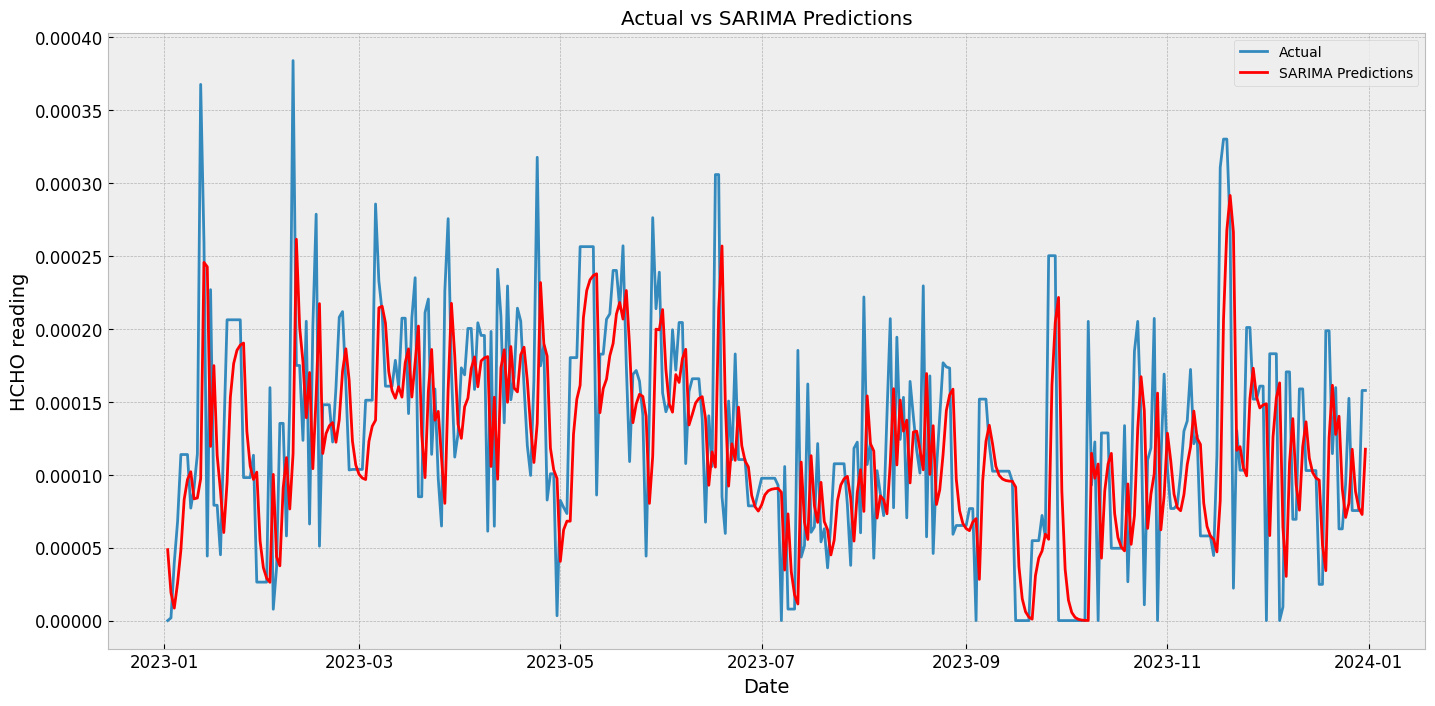

In [ ]:

df_test.index = pd.to_datetime(df_test.index)
plt.figure(figsize=(17, 8))
# Plot the actual values and SARIMA predictions
plt.plot(df_test.index, df_test['HCHO reading'], label='Actual')
plt.plot(df_test.index, predictionsDict['SARIMAX'], color='red', label='SARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.title('Actual vs SARIMA Predictions')
plt.legend()
plt.show()

from sklearn.metrics import r2_score

# Calculate R2 score for AR model
r2_ar = r2_score(df_test['HCHO reading'], predictionsDict['SARIMAX'])
print("R2 score for SARIMA model:", r2_ar)

# ***Evaluation Metrics***

In [ ]:
from sklearn.metrics import r2_score

# Calculate R2 score for AR model
r2_ar = r2_score(df_test['HCHO reading'], predictionsDict['AR'])
print("R2 score for AR model:", r2_ar)

R2 score for AR model: 0.20897392057016118


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, mean_squared_error, mean_squared_log_error
import numpy as np

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate the metrics for SARIMA
sarima_r2 = r2_score(df_test['HCHO reading'], predictionsDict['SARIMAX'])
sarima_mae = mean_absolute_error(df_test['HCHO reading'], predictionsDict['SARIMAX'])
sarima_medae = median_absolute_error(df_test['HCHO reading'], predictionsDict['SARIMAX'])
sarima_mse = mean_squared_error(df_test['HCHO reading'], predictionsDict['SARIMAX'])
sarima_msle = mean_squared_log_error(df_test['HCHO reading'], predictionsDict['SARIMAX'])
sarima_mape = mean_absolute_percentage_error(df_test['HCHO reading'], predictionsDict['SARIMAX'])

# Calculate evaluation metrics for MA model
ma_r2 = r2_score(df_test['HCHO reading'], predictionsDict['MA'])
ma_mae = mean_absolute_error(df_test['HCHO reading'], predictionsDict['MA'])
ma_medae = median_absolute_error(df_test['HCHO reading'], predictionsDict['MA'])
ma_mse = mean_squared_error(df_test['HCHO reading'], predictionsDict['MA'])
ma_mape = mean_absolute_percentage_error(df_test['HCHO reading'], predictionsDict['MA'])

# Calculate evaluation metrics for AR model
ar_r2 = r2_score(df_test['HCHO reading'],predictionsDict['AR'])
ar_mae = mean_absolute_error(df_test['HCHO reading'], predictionsDict['AR'])
ar_medae = median_absolute_error(df_test['HCHO reading'], predictionsDict['AR'])
ar_mse = mean_squared_error(df_test['HCHO reading'], predictionsDict['AR'])
ar_msle = mean_squared_log_error(df_test['HCHO reading'], predictionsDict['AR'])
ar_mape = mean_absolute_percentage_error(df_test['HCHO reading'], predictionsDict['AR'])

# Calculate the metrics for ARMA
arma_r2 = r2_score(df_test['HCHO reading'], predictionsDict['ARMA'])
arma_mae = mean_absolute_error(df_test['HCHO reading'], predictionsDict['ARMA'])
arma_medae = median_absolute_error(df_test['HCHO reading'], predictionsDict['ARMA'])
arma_mse = mean_squared_error(df_test['HCHO reading'], predictionsDict['ARMA'])
arma_msle = mean_squared_log_error(df_test['HCHO reading'], predictionsDict['ARMA'])
arma_mape = mean_absolute_percentage_error(df_test['HCHO reading'], predictionsDict['ARMA'])

# Print the metrics
print("SARIMA Metrics:")
print("R squared:", sarima_r2)
print("Mean Absolute Error:", sarima_mae)
print("Median Absolute Error:", sarima_medae)
print("Mean Squared Error:", sarima_mse)
print("Mean Squared Logarithmic Error:", sarima_msle)
print("Mean Absolute Percentage Error:", sarima_mape)
print()
print("ARMA Metrics:")
print("R squared:", arma_r2)
print("Mean Absolute Error:", arma_mae)
print("Median Absolute Error:", arma_medae)
print("Mean Squared Error:", arma_mse)
print("Mean Squared Logarithmic Error:", arma_msle)
print("Mean Absolute Percentage Error:", arma_mape)
print()
# Print AR model metrics
print("AR Model Metrics:")
print("R squared:", ar_r2)
print("Mean Absolute Error:", ar_mae)
print("Median Absolute Error:", ar_medae)
print("Mean Squared Error:", ar_mse)
print("Mean Squared Logarithmic Error:", ar_msle)
print("Mean Absolute Percentage Error:", ar_mape)
print()
# Print MA model metrics
print("MA Model Metrics:")
print("R squared:", ma_r2)
print("Mean Absolute Error:", ma_mae)
print("Median Absolute Error:", ma_medae)
print("Mean Squared Error:", ma_mse)
print("Mean Absolute Percentage Error:", ma_mape)


SARIMA Metrics:
R squared: 0.11584894974295679
Mean Absolute Error: 5.0218381952934924e-05
Median Absolute Error: 3.483634350887653e-05
Mean Squared Error: 4.8662032638159435e-09
Mean Squared Logarithmic Error: 4.8647867405119694e-09
Mean Absolute Percentage Error: inf

ARMA Metrics:
R squared: 0.21293439537804837
Mean Absolute Error: 5.037732636132829e-05
Median Absolute Error: 3.9296997975849845e-05
Mean Squared Error: 4.331862992115583e-09
Mean Squared Logarithmic Error: 4.330607451271332e-09
Mean Absolute Percentage Error: inf

AR Model Metrics:
R squared: 0.20897392057016118
Mean Absolute Error: 5.087679322376557e-05
Median Absolute Error: 3.840124619748601e-05
Mean Squared Error: 4.3536607103118096e-09
Mean Squared Logarithmic Error: 4.352416339873418e-09
Mean Absolute Percentage Error: inf

MA Model Metrics:
R squared: 0.16291893198674767
Mean Absolute Error: 5.4027260551636754e-05
Median Absolute Error: 4.5414801584685966e-05
Mean Squared Error: 4.607138818712471e-09
Mean Absol

# ***Auto Arima 2nd try***

In [ ]:
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Perform auto SARIMA
model = auto_arima(df_training['HCHO reading'],
                   seasonal=True, m=12,
                   stepwise=True, trace=True,
                   error_action='ignore', suppress_warnings=True)

# Fit the SARIMA model
model.fit(df_training['HCHO reading'])

# Predictions
pred = model.predict(n_periods=len(df_test))
pred = pd.Series(pred, index=df_test.index)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-23831.247, Time=3.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-23448.190, Time=0.29 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-23631.799, Time=4.49 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-23735.204, Time=6.62 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-23450.051, Time=0.17 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-23833.989, Time=1.37 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-23827.825, Time=1.07 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-23832.698, Time=7.78 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-23832.997, Time=4.51 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-23830.709, Time=8.34 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-23805.989, Time=4.03 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=-23808.626, Time=39.30 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=-23851.689, Time=4.92 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=-23846.825, Time

In [ ]:
# Calculate R2 score
r2 = r2_score(df_test['HCHO reading'], pred)

# Plot the predictions for the test set
plt.plot(df_training['HCHO reading'], label='Train')
plt.plot(df_test['HCHO reading'], label='Test')
plt.plot(pred, label='Prediction')
plt.legend()
plt.title(f'Auto SARIMA Predictions (R2 Score: {r2:.2f})')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.show()


# ***SARIMA with 3,0,3***

In [ ]:
# Create lagged features
def create_lagged_features(data, lag=1):
    for i in range(1, lag + 1):
        data[f'lag_{i}'] = data['HCHO reading'].shift(i)
    return data.dropna()

# Apply lagged features to the dataset
df_training = create_lagged_features(df_training, lag=3)
df_test = create_lagged_features(df_test, lag=3)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

index = len(df_training)
yhat = []

for t in tqdm(range(len(df_test['HCHO reading']))):
    temp_train = df['HCHO reading'][:len(df_training) + t]
    model = SARIMAX(temp_train, order=(3, 0, 3), seasonal_order=(0, 0, 0, 12))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat.append(predictions)

yhat = pd.concat(yhat)


100%|██████████| 361/361 [11:15<00:00,  1.87s/it]


In [20]:
from sklearn.metrics import mean_squared_error

def evaluate(y_true, y_pred):
    """
    Evaluates the performance of the forecast using Mean Squared Error (MSE)
    """
    mse = mean_squared_error(y_true, y_pred)
    return mse

In [ ]:

resultsDict['SARIMAX'] = evaluate(df_test['HCHO reading'], yhat.values)
predictionsDict['SARIMAX'] = yhat.values

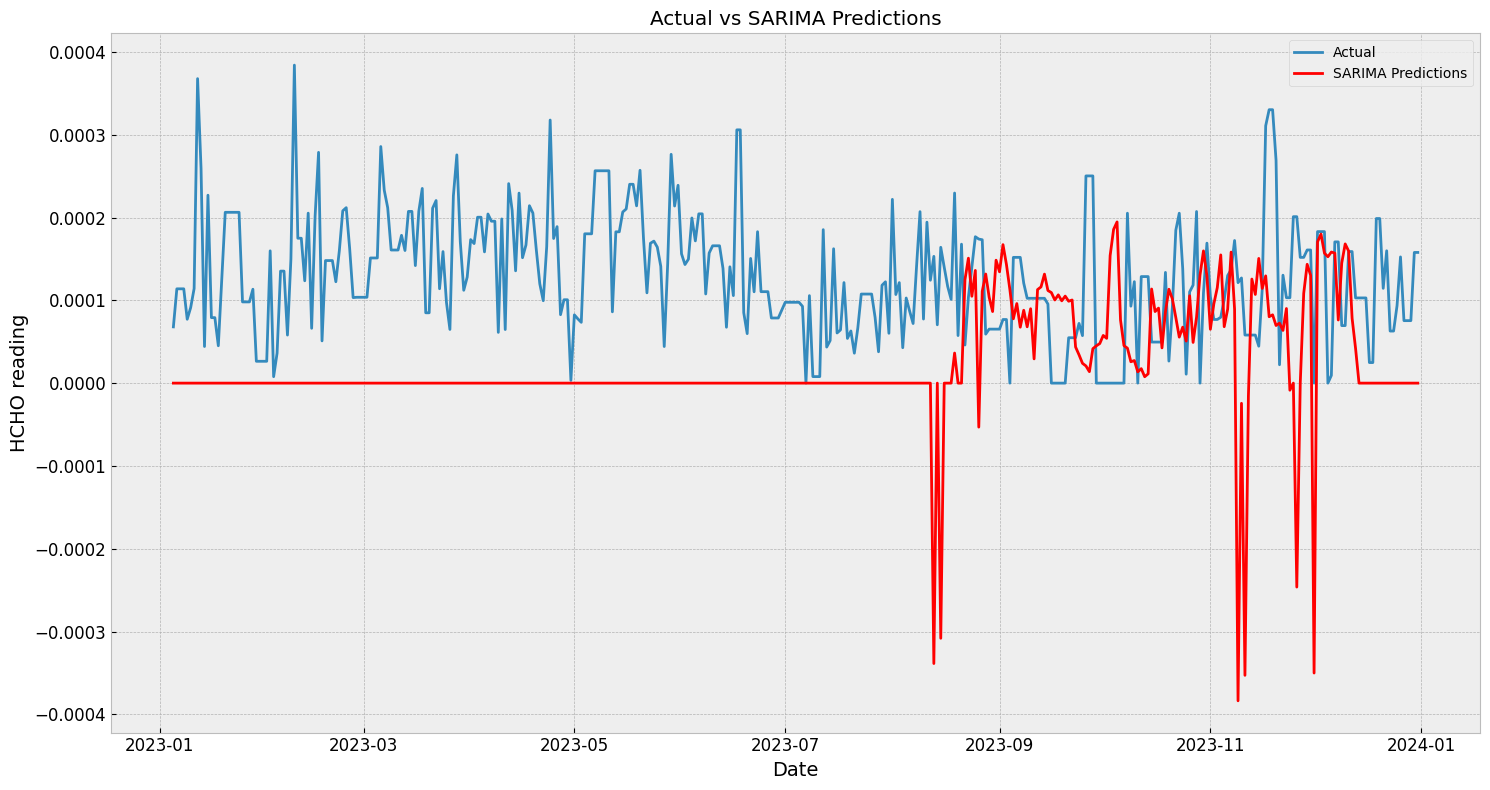

In [ ]:
df_test.index = pd.to_datetime(df_test.index)

# Set figure size
plt.figure(figsize=(15, 8))

# Plot the actual values and SARIMA predictions
plt.plot(df_test.index, df_test['HCHO reading'], label='Actual', linewidth=2)
plt.plot(df_test.index, predictionsDict['SARIMAX'], color='red', label='SARIMA Predictions', linewidth=2)
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.title('Actual vs SARIMA Predictions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ***SARIMA with 2,0,2***

In [ ]:
index = len(df_training)
yhat = []

for t in tqdm(range(len(df_test['HCHO reading']))):
    temp_train = df['HCHO reading'][:len(df_training) + t]
    model = SARIMAX(temp_train, order=(2, 0, 2), seasonal_order=(0, 0, 0, 12))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat.append(predictions)

yhat = pd.concat(yhat)


100%|██████████| 361/361 [07:38<00:00,  1.27s/it]


In [ ]:

resultsDict['SARIMAX'] = evaluate(df_test['HCHO reading'], yhat.values)
predictionsDict['SARIMAX'] = yhat.values

In [ ]:


plt.figure(figsize=(15, 8))

# Plot the actual values and SARIMA predictions
plt.plot(df_test.index, df_test['HCHO reading'], label='Actual', linewidth=2)
plt.plot(df_test.index, predictionsDict['SARIMAX'], color='red', label='SARIMA Predictions', linewidth=2)
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.title('Actual vs SARIMA Predictions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Trying Multivariate models**

In [ ]:
from sklearn.preprocessing import StandardScaler

def create_time_features(df, target=None):
    """
    Creates time series features from datetime index and includes relative humidity
    """
    df['Current Date'] = df.index
    df['relative_humidity'] = df['Relative Humidity']  # Add Relative Humidity column
    df['Skin Temperature'] = df['Skin Temperature']
    X = df.drop(['Current Date','Location','Next Date'], axis=1)  # Drop 'Current Date' before scaling
    if target:
        y = df[target]
        X = X.drop([target], axis=1)
        return X, y

    return X

X_train_df, y_train = create_time_features(df_training, target='HCHO reading')
X_test_df, y_test = create_time_features(df_test, target='HCHO reading')


scaler = StandardScaler()
scaler.fit(X_train_df)
X_train = scaler.transform(X_train_df)
X_test = scaler.transform(X_test_df)

X_train_df = pd.DataFrame(X_train, columns=X_train_df.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test_df.columns)





In [ ]:
print(X_train_df.columns)

In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# ***Baysian Ridge***

In [ ]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Linear models
# Bayesian Ridge
reg = linear_model.BayesianRidge()
reg.fit(X_train_imputed, y_train)
yhat = reg.predict(X_test_imputed)

resultsDict['BayesianRidge'] = evaluate(df_test['HCHO reading'], yhat)
predictionsDict['BayesianRidge'] = yhat

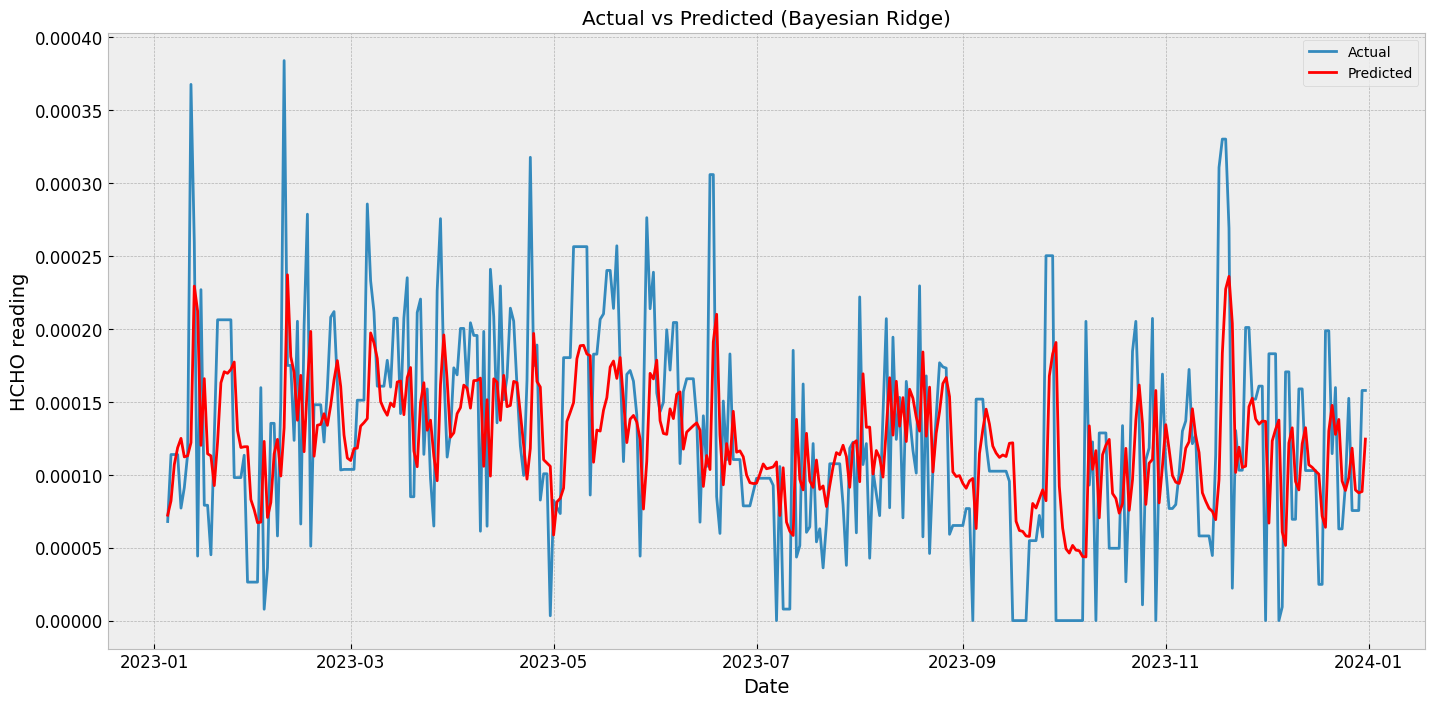

R2 Score (Bayesian Ridge): 0.18


In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Plot the predictions
plt.figure(figsize=(17, 8))
plt.plot(df_test.index, y_test, label='Actual')
plt.plot(df_test.index, yhat, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.title('Actual vs Predicted (Bayesian Ridge)')
plt.legend()
plt.show()

# Calculate R2 score
r2 = r2_score(y_test, yhat)
print(f'R2 Score (Bayesian Ridge): {r2:.2f}')


# ***Lasso***

In [ ]:
# Lasso
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train_imputed, y_train)
yhatt = reg.predict(X_test_imputed)
resultsDict['Lasso'] = evaluate(df_test['HCHO reading'], yhatt)
predictionsDict['Lasso'] = yhatt

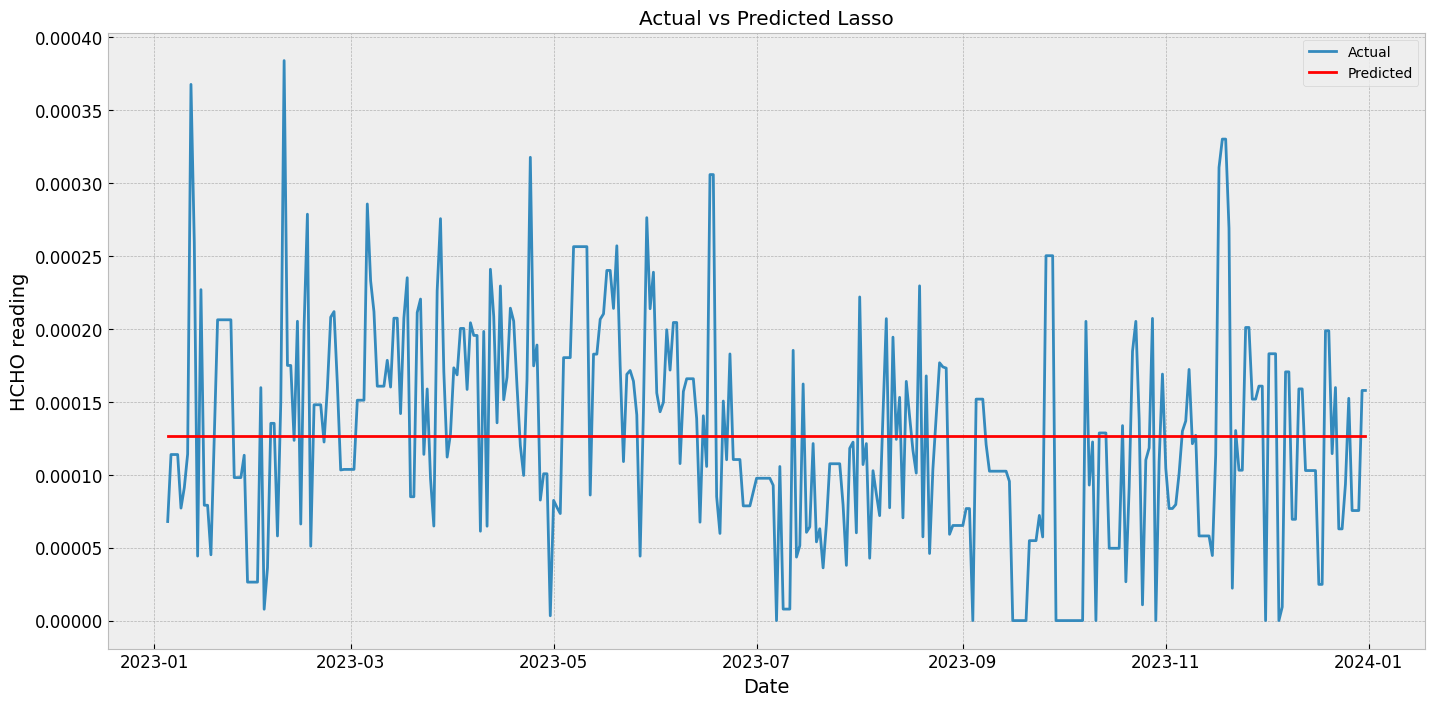

R2 Score (Lasso): -0.00


In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Plot the predictions
plt.figure(figsize=(17, 8))
plt.plot(df_test.index, y_test, label='Actual')
plt.plot(df_test.index, yhatt, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.title('Actual vs Predicted Lasso')
plt.legend()
plt.show()

# Calculate R2 score
r2 = r2_score(y_test, yhatt)
print(f'R2 Score (Lasso): {r2:.2f}')

# ***Random Forest***

In [ ]:
# Tree models
# RandomForest
reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(X_train_imputed, y_train)
predictions_tree = reg.predict(X_test_imputed)

resultsDict['Randomforest'] = evaluate(df_test['HCHO reading'], predictions_tree)
predictionsDict['Randomforest'] = predictions_tree

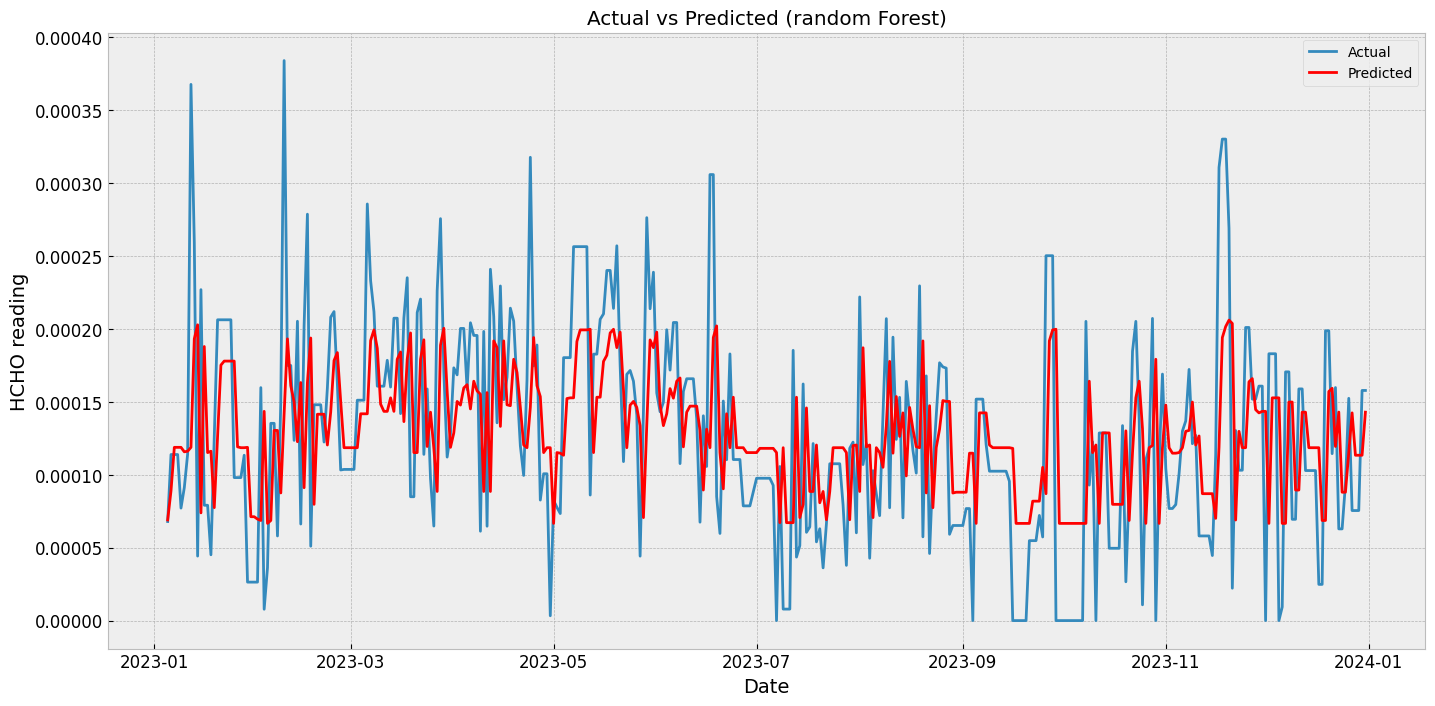

In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Plot the predictions
plt.figure(figsize=(17, 8))
plt.plot(df_test.index, y_test, label='Actual')
plt.plot(df_test.index, predictions_tree, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.title('Actual vs Predicted (random Forest)')
plt.legend()
plt.show()


In [ ]:
random_forest_r2 = r2_score(df_test['HCHO reading'], predictionsDict['Randomforest'])
random_forest_mae = mean_absolute_error(df_test['HCHO reading'], predictionsDict['Randomforest'])

print("Random forest Metrics:")
print("R squared:", random_forest_r2)
print("Mean Absolute Error:", random_forest_mae)

Random forest Metrics:
R squared: 0.1730728579281846
Mean Absolute Error: 5.193944361074791e-05


In [ ]:
import xgboost as xgb

# ***XG***

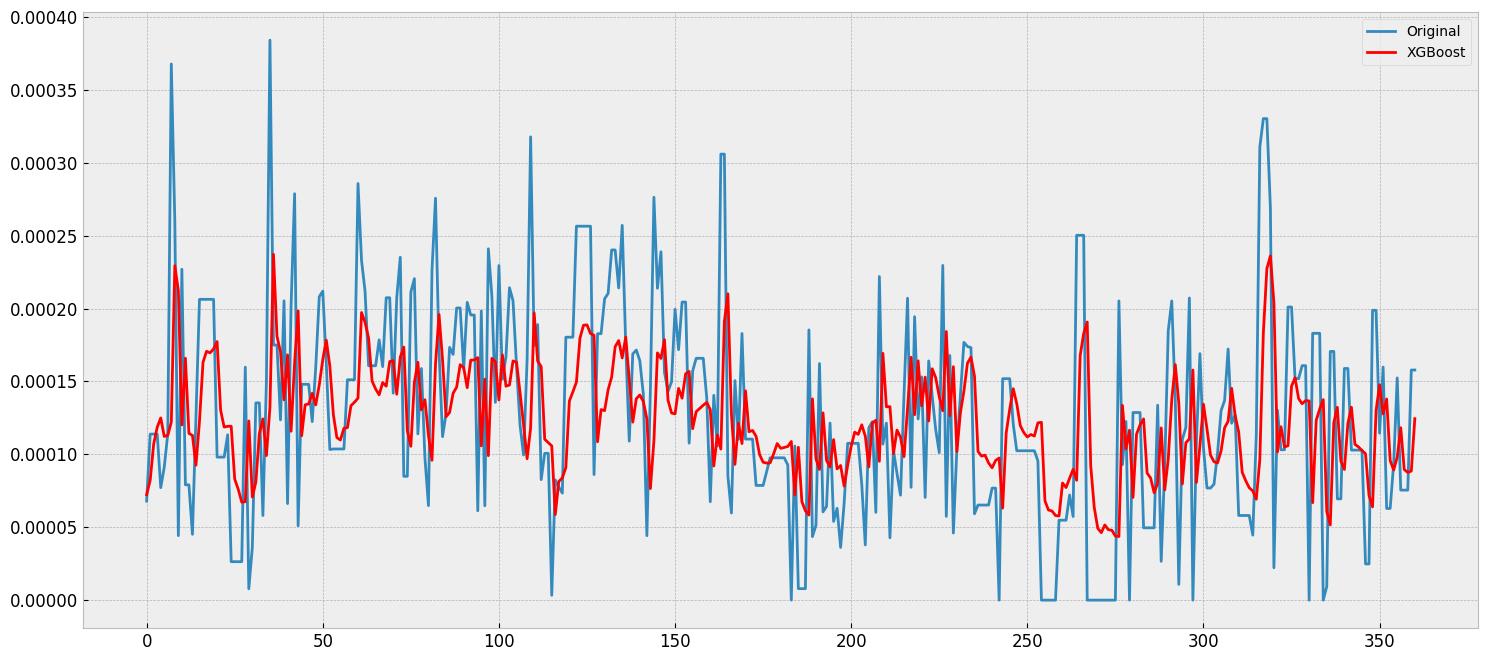

In [ ]:
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)

reg.fit(X_train_imputed, y_train, verbose=False)
predictions_trees = reg.predict(X_test_imputed)
resultsDict['XGBoost'] = evaluate(df_test['HCHO reading'], predictions_trees)
predictionsDict['XGBoost'] = yhat

plt.plot(df_test['HCHO reading'].values, label='Original')
plt.plot(predictionsDict['XGBoost'], color='red', label='XGBoost')
plt.legend()
plt.show()

In [ ]:
xgboost_r2 = r2_score(df_test['HCHO reading'], predictionsDict['XGBoost'])
xgboost_mae = mean_absolute_error(df_test['HCHO reading'], predictionsDict['XGBoost'])

print("Random forest Metrics:")
print("R squared:", xgboost_r2)
print("Mean Absolute Error:", rxgboost_mae)

# ***Tensorflow LSTMs***

In [12]:
BATCH_SIZE = 64
BUFFER_SIZE = 100
WINDOW_LENGTH = 24

def window_data(X, Y, window=7):
    x = []
    y = []
    for i in range(window-1, len(X)):
        x.append(X[i-window+1:i+1])
        y.append(Y[i])
    return np.array(x), np.array(y)

In [13]:
df.columns

Index(['Location', 'Next Date', 'HCHO reading', 'Temperature',
       'Skin Temperature', 'Specific Humidity', 'Relative Humidity',
       'Precipitation'],
      dtype='object')

In [14]:
# File paths for each DataFrame CSV file
colombo_full_csv_path = '/content/drive/MyDrive/data engineering CW/kurunegala_df_full.csv'


df = pd.read_csv(colombo_full_csv_path, header=0, index_col=0)

In [15]:
df.set_index('Current Date', inplace=True)


In [16]:
import numpy as np
import tensorflow as tf


X_w = df_training.drop(['Location','Next Date'], axis=1).values
y_w = df_training['HCHO reading'].values

# Convert y_w to float32 to match the data type expected by TensorFlow
y_w = y_w.astype(np.float32)

# Check the shape of the arrays
print("Shape of X_w:", X_w.shape)
print("Shape of y_w:", y_w.shape)

# Convert X_w and y_w to TensorFlow tensors for training data
X_w_tensor = tf.convert_to_tensor(X_w, dtype=tf.float32)
y_w_tensor = tf.convert_to_tensor(y_w, dtype=tf.float32)

# Create the train dataset
train_data = tf.data.Dataset.from_tensor_slices((X_w_tensor, y_w_tensor))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()


Shape of X_w: (1462, 6)
Shape of y_w: (1462,)


In [17]:
# Assuming you have another DataFrame called test_df
X_test_w = df_test.drop([ 'Location', 'Next Date'], axis=1).values
y_test_w = df_test['HCHO reading'].values

In [18]:
# Convert X_test_w and y_test_w to TensorFlow tensors for validation data
X_test_w_tensor = tf.convert_to_tensor(X_test_w, dtype=tf.float32)
y_test_w_tensor = tf.convert_to_tensor(y_test_w, dtype=tf.float32)

# Create the validation dataset
val_data = tf.data.Dataset.from_tensor_slices((X_test_w_tensor, y_test_w_tensor))
val_data = val_data.batch(BATCH_SIZE).repeat()

dropout = 0.0

simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(
        64, input_shape=(X_w.shape[1], 1), dropout=dropout),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='rmsprop', loss='mae')

EVALUATION_INTERVAL = 200
EPOCHS = 5

model_history = simple_lstm_model.fit(train_data, epochs=EPOCHS,
                                      steps_per_epoch=EVALUATION_INTERVAL,
                                      validation_data=val_data, validation_steps=50)

yhat = simple_lstm_model.predict(X_test_w).reshape(1, -1)[0]



Epoch 1/5
200/200 [==============================] - 4s 10ms/step - loss: 0.1024 - val_loss: 0.0825
Epoch 2/5
200/200 [==============================] - 2s 8ms/step - loss: 0.0559 - val_loss: 0.0198
Epoch 3/5
200/200 [==============================] - 2s 8ms/step - loss: 0.0368 - val_loss: 0.0382
Epoch 4/5
200/200 [==============================] - 2s 10ms/step - loss: 0.0269 - val_loss: 0.0258
Epoch 5/5
12/12 [==============================] - 1s 6ms/step


In [21]:

resultsDict['Tensorflow simple LSTM'] = evaluate(y_test_w, yhat)
predictionsDict['Tensorflow simple LSTM'] = yhat

In [22]:
print(X_test_w.dtype)

float64


In [23]:
print(y_test_w.dtype)

float64


In [24]:
np.isnan(X_test_w).any()

False

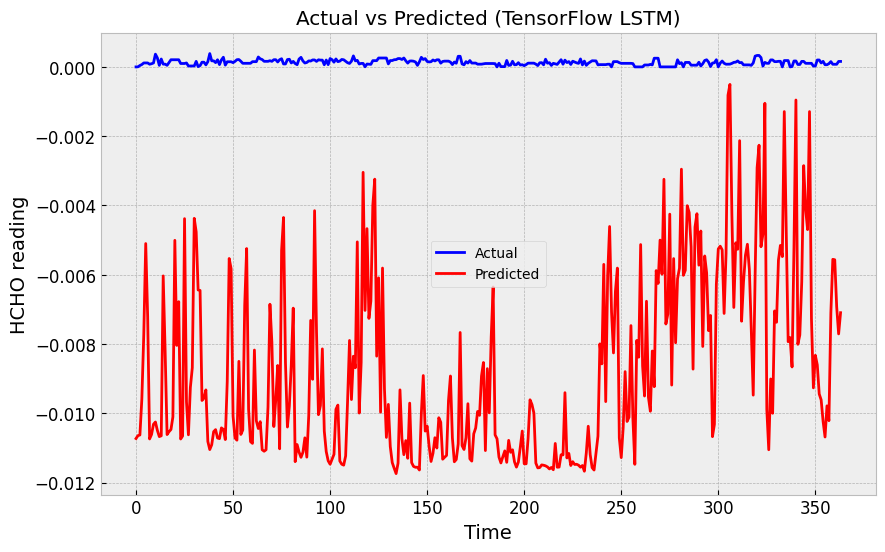

In [25]:
import matplotlib.pyplot as plt

# Plot the original test data
plt.figure(figsize=(10, 6))
plt.plot(y_test_w, label='Actual', color='blue')
plt.plot(yhat, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('HCHO reading')
plt.title('Actual vs Predicted (TensorFlow LSTM)')
plt.legend()
plt.show()


# ***TensorFlow LSTM 2nd method try***

In [26]:

dropout = 0.2
lstm_units = 64
dense_units = 32

#the number of epochs
EPOCHS = 5


simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(lstm_units, input_shape=(X_w.shape[1], 1), dropout=dropout),
    tf.keras.layers.Dense(dense_units, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile
simple_lstm_model.compile(optimizer='adam', loss='mae')

# Train
model_history = simple_lstm_model.fit(train_data, epochs=EPOCHS,
                                      steps_per_epoch=EVALUATION_INTERVAL,
                                      validation_data=val_data, validation_steps=50)

# Evaluate
yhat = simple_lstm_model.predict(X_test_w).reshape(1, -1)[0]

resultsDict['Tensorflow simple LSTM'] = evaluate(y_test_w, yhat)
predictionsDict['Tensorflow simple LSTM'] = yhat

200/200 [==============================] - 6s 13ms/step - loss: 0.0065 - val_loss: 0.0029
Epoch 2/5
200/200 [==============================] - 3s 13ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 3/5
200/200 [==============================] - 2s 10ms/step - loss: 0.0026 - val_loss: 0.0035
Epoch 4/5
200/200 [==============================] - 3s 16ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 5/5
12/12 [==============================] - 1s 5ms/step


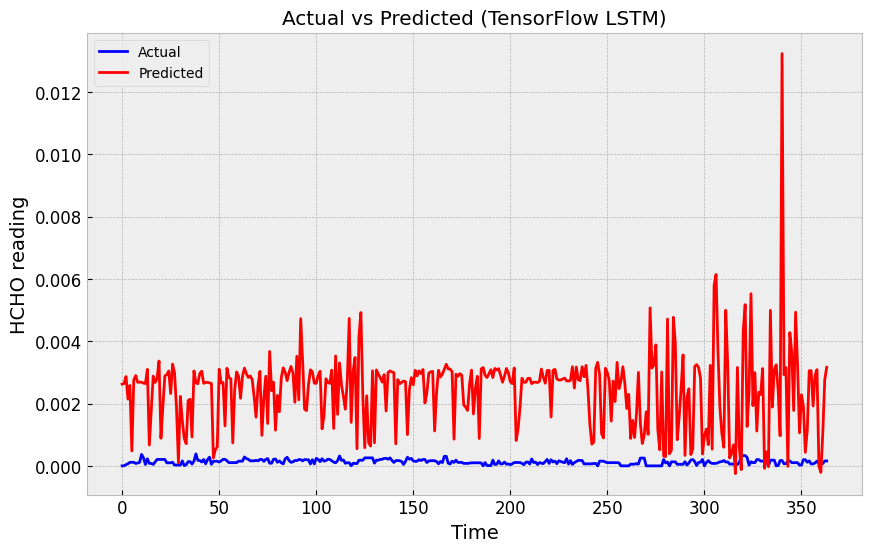

In [27]:
import matplotlib.pyplot as plt

# Plot the original test data
plt.figure(figsize=(10, 6))
plt.plot(y_test_w, label='Actual', color='blue')
plt.plot(yhat, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('HCHO reading')
plt.title('Actual vs Predicted (TensorFlow LSTM)')
plt.legend()
plt.show()


# ***LSTM 2nd method***

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


df_numeric = df.drop(['Location',  'Next Date'], axis=1)

# split the dataset into train and test
train_size = 1223
test_size = 603
train, test = df_numeric.iloc[0:train_size], df_numeric.iloc[train_size:]

# create dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back)].values
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back]['HCHO reading'])
    return np.array(dataX), np.array(dataY)

# reshape the dataset X = current time, and Yt+1 = future time period
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Convert trainX to float32 and reshape
trainX = np.reshape(trainX.astype('float32'), (trainX.shape[0], trainX.shape[2], trainX.shape[1]))
testX = np.reshape(testX.astype('float32'), (testX.shape[0], testX.shape[2], testX.shape[1]))

# Convert trainY and testY to float32
trainY = trainY.astype('float32')
testY = testY.astype('float32')

# let's create a RNN or LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adamax')

# fit the model
model.fit(trainX, trainY, batch_size=1, epochs=10, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)



Epoch 1/10
1221/1221 - 18s - loss: 7.7828e-04 - 18s/epoch - 14ms/step
Epoch 2/10
1221/1221 - 8s - loss: 3.5920e-05 - 8s/epoch - 7ms/step
Epoch 3/10
1221/1221 - 8s - loss: 2.1595e-05 - 8s/epoch - 6ms/step
Epoch 4/10
1221/1221 - 6s - loss: 1.3853e-05 - 6s/epoch - 5ms/step
Epoch 5/10
1221/1221 - 5s - loss: 8.9928e-06 - 5s/epoch - 4ms/step
Epoch 6/10
1221/1221 - 4s - loss: 6.0375e-06 - 4s/epoch - 3ms/step
Epoch 7/10
1221/1221 - 4s - loss: 4.1810e-06 - 4s/epoch - 3ms/step
Epoch 8/10
1221/1221 - 5s - loss: 3.0179e-06 - 5s/epoch - 4ms/step
Epoch 9/10
1221/1221 - 5s - loss: 2.2000e-06 - 5s/epoch - 4ms/step
Epoch 10/10
1221/1221 - 4s - loss: 1.6352e-06 - 4s/epoch - 4ms/step
19/19 [==============================] - 0s 4ms/step


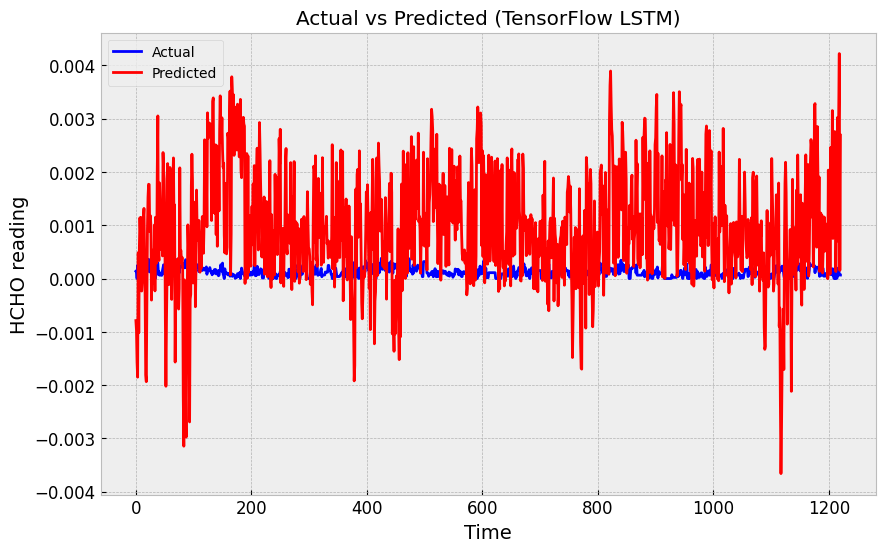

In [29]:
import matplotlib.pyplot as plt

# Plot the original test data
plt.figure(figsize=(10, 6))
plt.plot(trainY, label='Actual', color='blue')
plt.plot(trainPredict, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('HCHO reading')
plt.title('Actual vs Predicted (TensorFlow LSTM)')
plt.legend()
plt.show()
